In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from my_utils import dotdict

In [ ]:
from wandb_sweep import get_dls, get_learner

In [ ]:
from model_eval import get_val_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [ ]:
import wandb

api = wandb.Api()

#### tl_best5

In [ ]:
sweep_id = "1cesj6eh"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.test_evaluation = True

In [ ]:
config.normalize = False

In [ ]:
dls, _, n_channels = get_dls(config)

In [ ]:
learner = get_learner(config, dls, n_channels)

In [ ]:
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_val_preds(learner)

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred)

In [ ]:
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 98.14%
Macro-averaged F1-score: 96.84%


In [ ]:
vocab = list(learner.dls.train_ds.class_dict.keys())

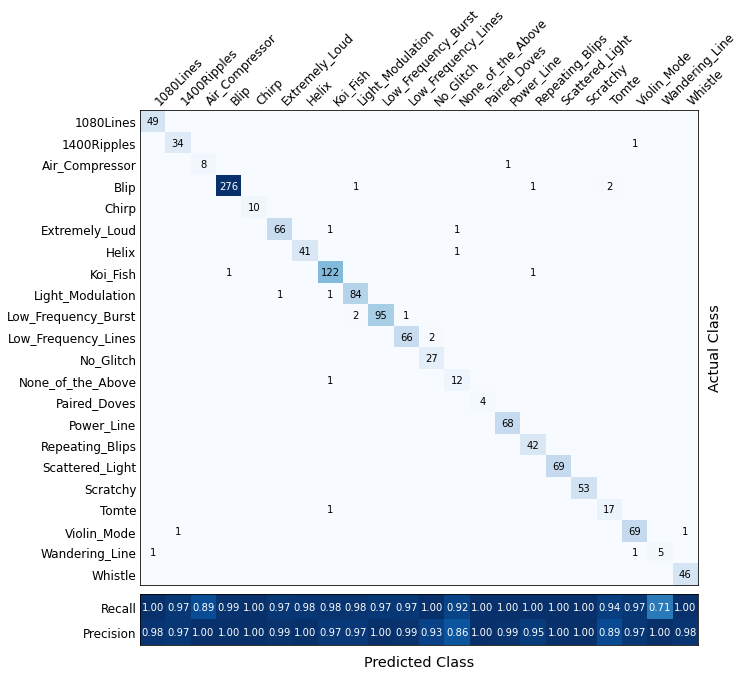

In [ ]:
fig, axes = plot_CM_PR(cm, y_true=y_true, y_pred=y_pred, vocab=vocab)
fig.savefig("../figs/glitches/15_tl_best5_test_cm.png", dpi=300, bbox_inches="tight")

In [ ]:
interp = Interpretation.from_learner(learner)

In [ ]:
channel_list = [0, 0, 2, 0, 
                0, 2, 2, 1, 
                2, 1, 2, 1,
                2, 2, 2, 2,
                2, 2, 2, 2,
                2, 2, 2, 2]

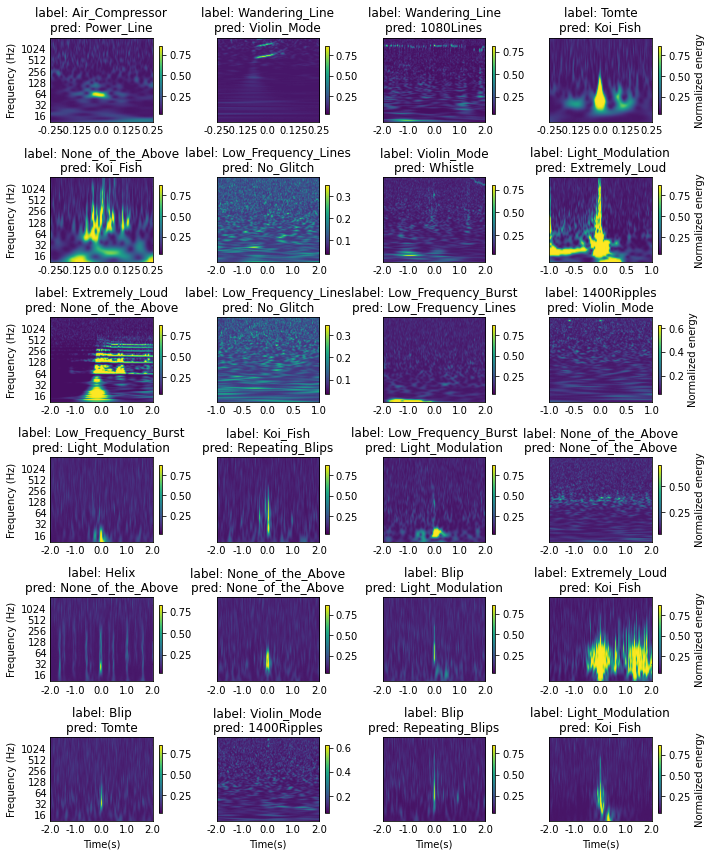

In [ ]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=6, ncols=4,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(10, 12)
)

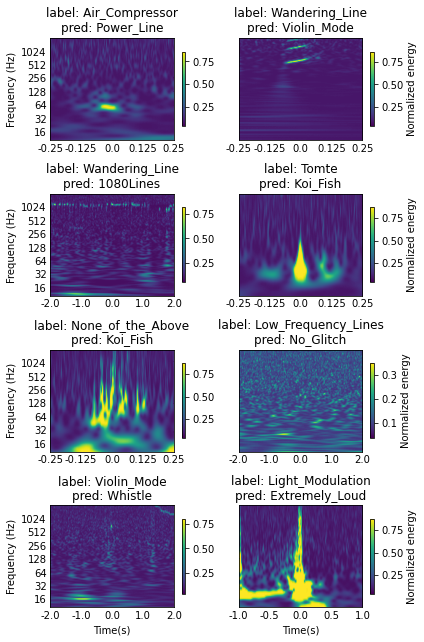

In [ ]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=4, ncols=2,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(6, 9)
)

fig.savefig('../figs/glitches/15_tl_best_test_mislabeled_samples.png', dpi=300)